In [1]:
import networkx as nx
import pandas as pd

data_frame = pd.read_table(
    "output.csv", names=["source", "target", "source_label", "target_label"], sep=","
)
data_frame = data_frame.iloc[1:]
data_frame.reset_index()
data_frame.head(20)

,source,target,source_label,target_label
1,0,9,Piotr Bródka,Stanisław Saganowski
2,0,3,Piotr Bródka,Przemysław Kazienko
3,0,9,Piotr Bródka,Stanisław Saganowski
4,0,3,Piotr Bródka,Przemysław Kazienko
5,0,3,Piotr Bródka,Przemysław Kazienko
6,0,1,Piotr Bródka,Tomasz Kajdanowicz
7,0,9,Piotr Bródka,Stanisław Saganowski
8,0,3,Piotr Bródka,Przemysław Kazienko
9,0,9,Piotr Bródka,Stanisław Saganowski
10,0,3,Piotr Bródka,Przemysław Kazienko


In [50]:
sent_count = data_frame.groupby(["source", "target"]).size()
all_sent_count = data_frame.groupby("source").size()

unique_data_frame = pd.DataFrame(columns=data_frame.columns)

for (source, target), count in sent_count.items():
    weight = count / all_sent_count[source]
    temp_df = data_frame[
        (data_frame["source"] == source) & (data_frame["target"] == target)
    ]
    temp_df["weight"] = weight
    temp_df["source"] = (temp_df["source"].astype(int) + 1).astype(str)
    temp_df["target"] = (temp_df["target"].astype(int) + 1).astype(str)
    unique = temp_df.nlargest(1, "weight")
    unique_data_frame = pd.concat([unique_data_frame, unique])

unique_data_frame.to_csv("wighted.csv", index=False)

C:\Users\ep20254\AppData\Local\Temp\ipykernel_9264\3760944495.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['weight'] = weight
C:\Users\ep20254\AppData\Local\Temp\ipykernel_9264\3760944495.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["source"] = (temp_df["source"].astype(int) + 1).astype(str)
C:\Users\ep20254\AppData\Local\Temp\ipykernel_9264\3760944495.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

KeyError: 1

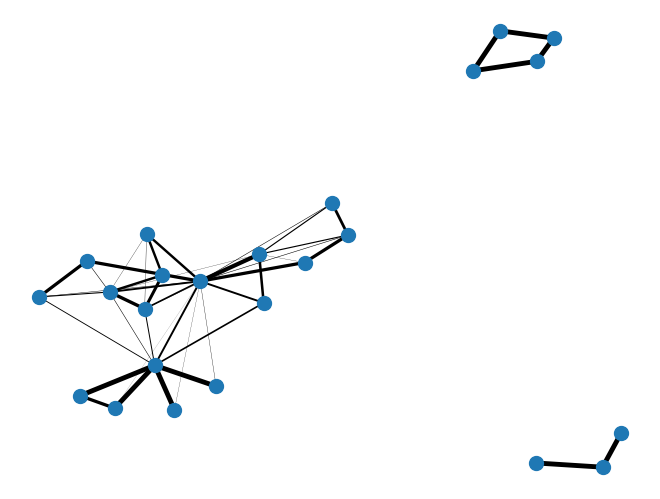

In [51]:
unique_data_frame.reset_index()

graph = nx.from_pandas_edgelist(
    unique_data_frame, source="source", target="target", edge_attr="weight"
)

weights = [d["weight"] * 7 for _, _, d in graph.edges(data=True)]

pos = nx.spring_layout(graph, seed=2138, weight="weight")

nx.draw(graph, pos=pos, width=weights, node_size=100)

if "source" not in unique_data_frame.columns:
    unique_data_frame = unique_data_frame[["target", "source", "source_label"]]

unique_data_frame = unique_data_frame.merge(
    pd.DataFrame({"source": graph.nodes()}), how="right"
)

labels = {
    int(n): unique_data_frame.loc[
        unique_data_frame["source"] == n, "source_label"
    ].iloc[0]
    for n in graph.nodes()
}
nx.draw_networkx_labels(graph, pos=pos, labels=labels)